# Intro Deep Learning



# Import Data

In [1]:
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/DeepLearning/train.csv")

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7683 entries, 0 to 7682
Columns: 115 entries, Id to paint_color_yellow
dtypes: float64(1), int64(114)
memory usage: 6.7 MB


# Build Standard Regression Model

In [15]:
# Import Functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Instantiate Model
model = LinearRegression()

# Create Train Data
X = train.drop("price", axis=1)
y = train["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
model.fit(X_train, y_train)

#make prediction
y_pred = model.predict(X_test)

# Evaluate Model Performance
mean_squared_error(y_test, y_pred, squared=False)

7541.309925398203

# Build Neural Network

## 1) Import Tensorflow / Keras

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2) Build & Compile Network

In [18]:
model = Sequential()

model.add(Dense(114, input_shape=(114,), activation='relu')) # the input layer takes always the number of features
model.add(Dense(50, activation='relu'))                      # hidden layer with 50 neurons
model.add(Dense(50, activation='relu'))                      # hidden layer with 50 neurons
model.add(Dense(10, activation='relu'))                      # hidden layer with 10 neurons
model.add(Dense(1))                                          # the output layer consists of 1 neuron in regression 

model.compile(optimizer="adam", loss='mse')

## 3) Train Network

In [25]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)

Epoch 1/100
337/337 [==============================] - 1s 2ms/step - loss: 64652932.0000 - val_loss: 77738992.0000
Epoch 2/100
337/337 [==============================] - 1s 2ms/step - loss: 64187436.0000 - val_loss: 82703024.0000
Epoch 3/100
337/337 [==============================] - 1s 2ms/step - loss: 62897956.0000 - val_loss: 67335376.0000
Epoch 4/100
337/337 [==============================] - 1s 2ms/step - loss: 63174756.0000 - val_loss: 65055832.0000
Epoch 5/100
337/337 [==============================] - 1s 2ms/step - loss: 61094192.0000 - val_loss: 66372272.0000
Epoch 6/100
337/337 [==============================] - 1s 2ms/step - loss: 64802380.0000 - val_loss: 68502984.0000
Epoch 7/100
337/337 [==============================] - 1s 2ms/step - loss: 61372120.0000 - val_loss: 63231720.0000
Epoch 8/100
337/337 [==============================] - 1s 2ms/step - loss: 61459540.0000 - val_loss: 72868656.0000
Epoch 9/100
337/337 [==============================] - 1s 2ms/step - loss: 64786



*   epochs = number of times the entire data set is passed through the network
*   batch_size = number of instances that are passed trough the network at once



## 4) Visualize Training Process

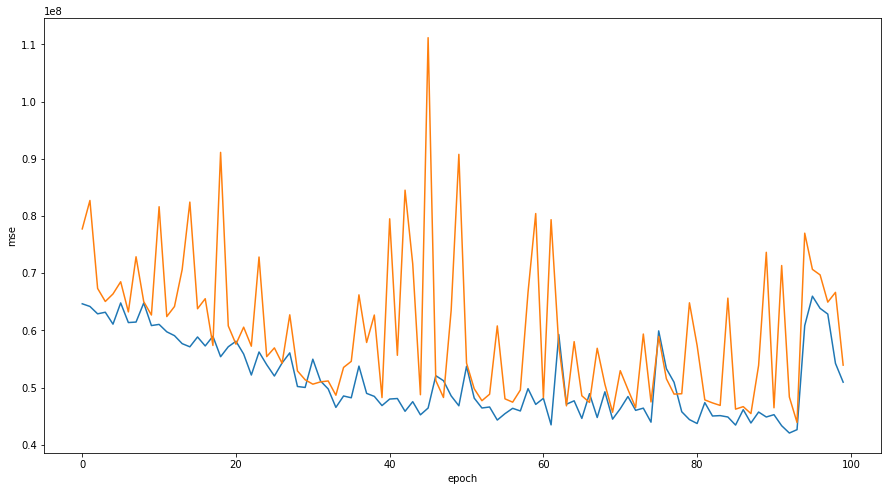

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])

## 5) Calculate Error

In [27]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

7343.836494577087